# **Predictive Modelling** - Purchase Data
This notebook is using a data of chocolate candy bar purchase information from supermarket customers. Customer segmentation model has been created in the previous notebook (See `customer_segmentation.ipynb`) .

The goal of this notebook is to model the price elasticity of every chocolate brand according to customer's segments to decide how far we can reduce or increase the price of those chocolate candy.
  
### Tasks:
1. Data Preparation
2. Feature Engineering
3. Modelling

## Import Library

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression

## Explore Data

In [2]:
#load data
purchase = pd.read_csv('/content/drive/MyDrive/Course_Data/purchase data.csv')

In [3]:
purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


Data Dictionary: <br>
<code>Day</code> : The day customer visit the store <br>
<code>Incidence</code> : Whether the customer buy chocolate (1) or not (0) <br>
<code>Brand</code> : The brand customers choose <br>
<code>Last_Inc_...</code> : The previous purchase of customer <br>
<code>Promotion_...</code> : Whether the brand is on promotion (1) / not (0)  <br>

## Data Preparation

### Apply Clustering

In [4]:
#load model 
scaler  = pickle.load(open('/content/drive/MyDrive/Course_Data/scaler.pickle', 'rb'))
pca  = pickle.load(open('/content/drive/MyDrive/Course_Data/pca.pickle', 'rb'))
kmeans  = pickle.load(open('/content/drive/MyDrive/Course_Data/kmeans_pca.pickle', 'rb'))

In [5]:
#segmentation features
feature_cols = ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']

#scaling features
seg_features = scaler.transform(purchase[feature_cols])         #the scaler already fitted to the data before

In [6]:
#reduce dimensionality
seg_pca = pca.transform(seg_features)

In [7]:
#create segment
seg_kmeans = kmeans.predict(seg_pca)

In [8]:
#generate new table with cluster info
df_purchase = purchase.copy()
df_purchase['clusters'] = seg_kmeans 

In [9]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusters
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


### Transform Dataset 

In [10]:
dummies = pd.get_dummies(df_purchase['clusters'], prefix = 'clusters', prefix_sep= '_')
dummies

,clusters_0,clusters_1,clusters_2,clusters_3
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
58688,0,0,1,0
58689,0,0,1,0
58690,0,0,1,0
58691,0,0,1,0


In [11]:
df_concat= pd.concat([df_purchase, dummies], axis = 1) 

In [12]:
df = df_concat.copy()
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,clusters,clusters_0,clusters_1,clusters_2,clusters_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


In [13]:
df.shape

(58693, 29)

In [14]:
#define label and feature
label = df['Incidence']
feature = pd.DataFrame()
feature['mean_price'] = df[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].mean(axis = 1)
feature

,mean_price
0,2.044
1,2.028
2,2.028
3,2.028
4,2.030
...,...
58688,2.060
58689,2.060
58690,2.086
58691,2.092


## Purchase Probability

In [15]:
#logistic regression model initiation
prob_model = LogisticRegression(solver = 'sag')

In [16]:
#fit to data
prob_model.fit(X = feature, y = label)

LogisticRegression(solver='sag')

In [17]:
#check coefficient
prob_model.coef_

array([[-2.34775506]])

In [18]:
#check price range
price = df[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
price.describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


From this table, we'll make purchase probability prediction for a range of prices, and also the price elasticity

In [19]:
#create price range
price_range = np.linspace(price.min().min()-0.5, price.max().max()+0.5, 100)
price_range

array([0.6       , 0.62727273, 0.65454545, 0.68181818, 0.70909091,
       0.73636364, 0.76363636, 0.79090909, 0.81818182, 0.84545455,
       0.87272727, 0.9       , 0.92727273, 0.95454545, 0.98181818,
       1.00909091, 1.03636364, 1.06363636, 1.09090909, 1.11818182,
       1.14545455, 1.17272727, 1.2       , 1.22727273, 1.25454545,
       1.28181818, 1.30909091, 1.33636364, 1.36363636, 1.39090909,
       1.41818182, 1.44545455, 1.47272727, 1.5       , 1.52727273,
       1.55454545, 1.58181818, 1.60909091, 1.63636364, 1.66363636,
       1.69090909, 1.71818182, 1.74545455, 1.77272727, 1.8       ,
       1.82727273, 1.85454545, 1.88181818, 1.90909091, 1.93636364,
       1.96363636, 1.99090909, 2.01818182, 2.04545455, 2.07272727,
       2.1       , 2.12727273, 2.15454545, 2.18181818, 2.20909091,
       2.23636364, 2.26363636, 2.29090909, 2.31818182, 2.34545455,
       2.37272727, 2.4       , 2.42727273, 2.45454545, 2.48181818,
       2.50909091, 2.53636364, 2.56363636, 2.59090909, 2.61818

In [20]:
#check probabilty prediction head 10
purchase = prob_model.predict_proba(pd.DataFrame(price_range))
purchase[:10]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[0.10164474, 0.89835526],
       [0.10764242, 0.89235758],
       [0.11394911, 0.88605089],
       [0.12057538, 0.87942462],
       [0.12753151, 0.87246849],
       [0.13482743, 0.86517257],
       [0.14247257, 0.85752743],
       [0.15047582, 0.84952418],
       [0.15884537, 0.84115463],
       [0.1675886 , 0.8324114 ]])

### General Price Elasticity 

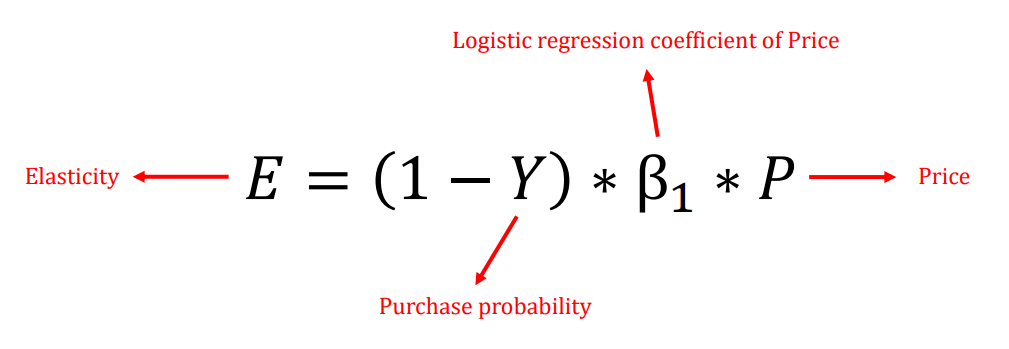

In [21]:
#calculate elasticity
elasticity = (1-purchase[:, 1]) * prob_model.coef_[0, 0] * price_range

In [22]:
pd.options.display.max_rows = None
df_e = pd.DataFrame({'price_range':price_range, 'mean_pe':elasticity})
df_e

,price_range,mean_pe
0,0.600000,-0.143182
1,0.627273,-0.158523
2,0.654545,-0.175107
3,0.681818,-0.193010
4,0.709091,-0.212311
5,0.736364,-0.233090
6,0.763636,-0.255429
7,0.790909,-0.279413
8,0.818182,-0.305125
9,0.845455,-0.332650


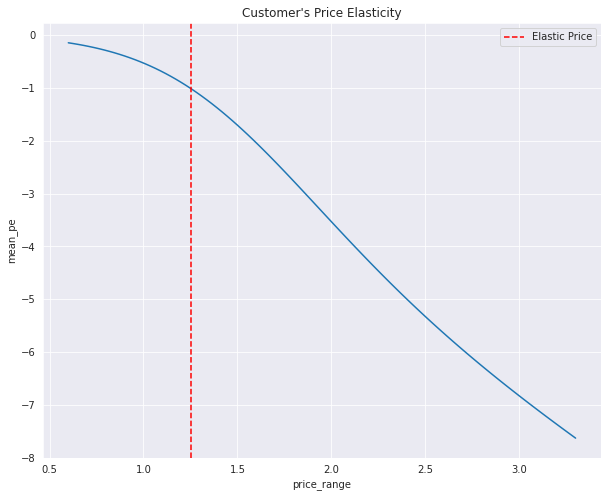

In [23]:
#plot price elasticity curve
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
sns.lineplot( x = 'price_range', y = 'mean_pe', data = df_e) 
plt.axvline(df_e[df_e['mean_pe'] <= -1]['price_range'].values[0], c= 'red', linestyle = '--', label = 'Elastic Price')
plt.legend()
plt.title("Customer's Price Elasticity")
plt.show()

From the plot above, we can see that for overall customers, the mean candy price starts to be elastic at 1.25$

### Clusters Price Elasticity

In [ ]:
#create elasticity calculation function
def elasticity_calc(cluster):
  dfc = df[df['clusters'] == cluster]
  feature = pd.DataFrame()
  price = dfc[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']]
  feature['mean_price'] = price.mean(axis = 1)
  label = dfc['Incidence']
  model = LogisticRegression(solver = 'sag')
  model.fit(feature, label)
  price_range = np.linspace(price.min().min()-0.5, price.max().max()+0.5, 100)
  purchase = model.predict_proba(pd.DataFrame(price_range))
  e = (1-purchase[:, 1]) * model.coef_[0, 0] * price_range
  df_e = pd.DataFrame({'cluster':cluster, 'price':price_range, 'mean_pe':e})
  return df_e

In [ ]:
#create elasticity table for each cluster
e_0 = elasticity_calc(0)
e_1 = elasticity_calc(1)
e_2 = elasticity_calc(2)
e_3 = elasticity_calc(3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#concat and cluster labelling
e_c = pd.concat([e_0, e_1, e_2, e_3]).reset_index(drop = True)
e_c['cluster_label'] = e_c['cluster'].map({0:'Standard', 1:'Career-Focused', 2:'Fewer-Opportunities', 3:'Well-Off'})
e_c.head()

,cluster,price,mean_pe,cluster_label
0,0,0.600000,-0.293324,Standard
1,0,0.627273,-0.315257,Standard
2,0,0.654545,-0.338061,Standard
3,0,0.681818,-0.361748,Standard
4,0,0.709091,-0.386326,Standard


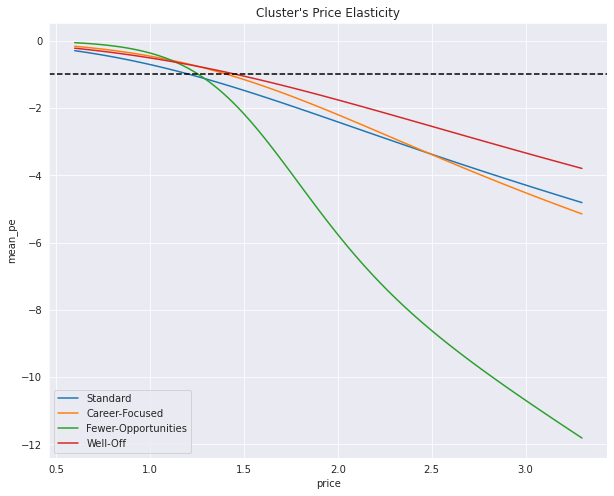

In [ ]:
#plot elasticity results fro all clusters
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))
sns.lineplot(x = 'price', y = 'mean_pe', data = e_c, hue = 'cluster_label')
plt.axhline(-1, c = 'k', linestyle = '--')
plt.legend()
plt.title("Cluster's Price Elasticity")
plt.show()

As we can see from the plot, the elastic price for **Career-Focused** and **Well-Off** segment is very close. Also, the elastic price for **Standard** segment turns out to be lower than the **Fewer-Opportunities** segment.

## Price and Promotion Model

In this section, we'll use not only prize but also promotion as features

In [ ]:
#reset pandas showing parameter
pd.options.display.max_rows = 20

In [ ]:
#set x,y for model
promotion_label = df['Incidence']
feature['mean_promotion'] = df[['Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']].mean(axis = 1)
feature.head()

,mean_price,mean_promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [ ]:
#set model
model_promotion = LogisticRegression(solver = 'sag')

In [ ]:
#fit model
model_promotion.fit(feature, promotion_label)

LogisticRegression(solver='sag')

In [ ]:
#print coefficient 
model_promotion.coef_

array([[-1.49404871,  0.56150608]])

**Question** <br>
Can we interpret the absolute value of model coefficient of logistic regression as feature importance?

### Purchase with promotion


In [ ]:
#create dataset with promotion
feature_promotion = pd.DataFrame(price_range)
feature_promotion['mean_promotion'] = 1
feature_promotion.rename(columns = {0:'mean_price'}, inplace = True)

In [ ]:
feature_promotion.head()

,mean_price,mean_promotion
0,0.600000,1
1,0.627273,1
2,0.654545,1
3,0.681818,1
4,0.709091,1


In [ ]:
# predict purchase proba with promotion
purchase_promotion = model_promotion.predict_proba(feature_promotion)

In [ ]:
#calculate elasticity with promotion
e_prom =  (1-purchase_promotion[:, 1]) * model_promotion.coef_[0, 0] * price_range

In [ ]:
#promotion dataframe
df_promotion = feature_promotion.copy()
df_promotion['elasticity'] = e_prom
df_promotion.head()

,mean_price,mean_promotion,elasticity
0,0.600000,1,-0.170533
1,0.627273,1,-0.184242
2,0.654545,1,-0.198624
3,0.681818,1,-0.213699
4,0.709091,1,-0.229488


### Purchase without promotion


In [ ]:
#create dataset with no promotion
feature_no_promotion = pd.DataFrame(price_range)
feature_no_promotion['mean_promotion'] = 0
feature_no_promotion.rename(columns = {0:'mean_price'}, inplace = True)

In [ ]:
feature_no_promotion.head()

,mean_price,mean_promotion
0,0.600000,0
1,0.627273,0
2,0.654545,0
3,0.681818,0
4,0.709091,0


In [ ]:
# predict purchase proba with no promotion
purchase_no_promotion = model_promotion.predict_proba(feature_no_promotion)

In [ ]:
#calculate elasticity with no_promotion
e_noprom =  (1-purchase_no_promotion[:, 1]) * model_promotion.coef_[0, 0] * price_range

In [ ]:
#no promotion dataframe
df_no_promotion = feature_no_promotion.copy()
df_no_promotion['elasticity'] = e_noprom
df_no_promotion.head()

,mean_price,mean_promotion,elasticity
0,0.600000,0,-0.261520
1,0.627273,0,-0.281364
2,0.654545,0,-0.302037
3,0.681818,0,-0.323550
4,0.709091,0,-0.345917


In [ ]:
#finishing dataframe
df_prom_viz = pd.concat([df_promotion, df_no_promotion]).reset_index(drop = True)
df_prom_viz['status'] = np.where(df_prom_viz['mean_promotion'] == 1, 'Promotion', 'No Promotion')
df_prom_viz.sample(5)

,mean_price,mean_promotion,elasticity,status
29,1.390909,1,-0.901241,Promotion
39,1.663636,1,-1.330030,Promotion
76,2.672727,1,-3.348918,Promotion
50,1.963636,1,-1.886719,Promotion
118,1.090909,0,-0.752501,No Promotion


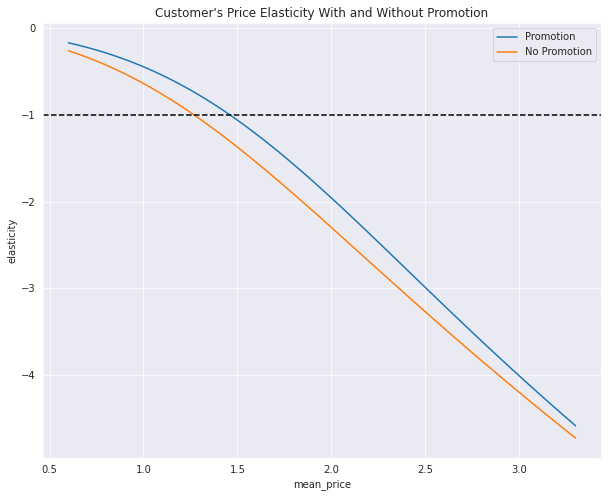

In [ ]:
#plot elasticity with promotion feature
plt.figure(figsize = (10,8))
sns.lineplot(x = 'mean_price', y = 'elasticity', data = df_prom_viz, hue = 'status')
plt.axhline(-1, c = 'k', linestyle = '--')
plt.legend()
plt.title("Customer's Price Elasticity With and Without Promotion")
plt.show()

In [ ]:
#print elastic prices with promotion and no promotion
print('Elastic Price With Promotion:', df_promotion[df_promotion['elasticity'] <= -1]['mean_price'].iloc[0])
print('Elastic Price With No Promotion:', df_no_promotion[df_no_promotion['elasticity'] <= -1]['mean_price'].iloc[0])

Elastic Price With Promotion: 1.4727272727272727
Elastic Price With No Promotion: 1.2818181818181817


So for overall customers, we can see that the promotion have an impact on price elasticity. With promotion label on the products, we can push/increase the candy price a little bit higher than without promotion.